#Reto 2 - Programación cientifica
- Grupo 1:
  - Juan Coronel - 202111207
  - Obed Cabanzo - 201911749

#1. Explicación general del problema


En el ciclismo existen distintas formas de registrar los movimientos y posiciones del ciclista durante el entrenamiento o la carrera. Lo anterior nos permite comprender como funciona la anatomia del ciclista y asi poder realizar analisis de velocidad o posicion, dependiendo de las dimensiones tomadas, para fines deportivos e investigativos. Lo que se busca lograr en este proyecto para contribuir a este tipo de investigaciones, es crear un modelo de machine learning, basado en regresion lineal, para predecir la posicion de la rodilla izquierda de un ciclista, basado en la posicion de la rodilla derecha. Cabe recalcar que el modelo sera entrenado con datos reales de la rodilla izquierda y derecha tomados del laboratorio de Ingenieria Biomedica de la universidad de los andes.

#2. Definición componentes del problema de optimización



- **Variables de decisión:**
  - $\beta_0, \beta_1, \beta_2, ..., \beta_n$.

- **Función Objetivo:**
  - min$_{\beta \in R^n}$ $f(β)$ = min$_{\beta \in R^n}$  $||y - Hβ||_2^2 + c||β||_2^2$

- **Minimizador:**
  -  $β^*$ = args min$_{\beta \in R^n} ||y - Hβ||_2^2 + c||β||_2^2$


- **Minimo**:
  -  $f(β^*)$ = $||y - Hβ^*||_2^2 + c||β^*||_2^2$


#3. Entendimiento y preparacion de datos

## 3.1 Perfilamiento de datos

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

train = pd.read_csv("./data/train.csv", sep=";")
train.shape

(5040, 2)

Se muestra un ejemplo de los datos presentes en el dataframe:

In [ ]:
train.head(5)

,der,izq
0,"146,567","74,4195"
1,"146,528","74,4264"
2,"146,484","74,4339"
3,"146,438","74,4419"
4,"146,389","74,4503"


Se hace una descripción de los datos para destacar las variables categóricas o numéricas:

In [ ]:
train.dtypes

der    object
izq    object
dtype: object

Note que las dos columnas son cadenas de texto (strings), por ende, para poder manipular estos valores en la regresión, es necesario transformar estos tipos de datos a enteros (integers). Lo anterior se definira mas adelante en el notebook.

##3.2 Calidad de los datos

###3.2.1 Unicidad
Verifiquemos el numero de filas duplicadas, es decir, el numero de filas que tienen exactamente los mismos valores en las mismas columnas. Note que no hay ninguna fila duplicada, por lo cual no es necesario hacer modificaciones en esta parte.

In [ ]:
train.duplicated().sum()

0

###3.2.2 Completitud
Note que la completitud se muestra en porcentaje de valores no nulos, es decir, una completitud de 100% indica que no hay ningun valor nulo en esa columna. Note que no hay ningun dato nulo, por lo cual no es necesario hacer modificaciones en esta parte.

In [ ]:
completitud = train.count() / len(train) * 100
completitud

der    100.0
izq    100.0
dtype: float64

###3.2.3 Validez
Miremos que tan validos son los valores en la columnas, para eso, tenemos que imprimir los valores unicos de cada columna y comprobar que resultados atipicos obtenemos. Note que por el momento los valores son validos en los rangos esperados y definidos por el enunciado.

In [ ]:
# Mostrar los valores únicos de las columnas categóricas
for col in train.select_dtypes(include=['object']):
    print(f"Valores únicos de {col}: {train[col].unique()}")

Valores únicos de der: ['146,567' '146,528' '146,484' ... '75,0909' '75,0251' '74,973']
Valores únicos de izq: ['74,4195' '74,4264' '74,4339' ... '146,55' '147,08' '147,294']


##3.3 Preparación de datos


###3.3.1 **Conversion a variables numericas:** Ahora necesitamos convertir las variables que segun el diccionario de datos deberian ser numericas y las variables categoricas, a numericas (valga la redudancia).



In [ ]:
import pandas as pd


# 1. Reemplazar las comas por puntos en las cadenas
train['der'] = train['der'].str.replace(',', '.', regex=True)
train['izq'] = train['izq'].str.replace(',', '.', regex=True)

# 2. Convertir las cadenas en enteros
train['izq'] = train['izq'].astype(float)
train['der'] = train['der'].astype(float)

# Mostrar el DataFrame resultante
print(train)

           der       izq
0     146.5670   74.4195
1     146.5280   74.4264
2     146.4840   74.4339
3     146.4380   74.4419
4     146.3890   74.4503
...        ...       ...
5035   75.2692  146.5500
5036   75.1718  146.8320
5037   75.0909  147.0800
5038   75.0251  147.2940
5039   74.9730  147.4730

[5040 rows x 2 columns]


In [ ]:
# Ahora evidenciamos los tipos de datos convertidos
train.dtypes

der    float64
izq    float64
dtype: object

En efecto, ahora los valores son valores flotantes, por ende, ya podemos empezar a manipularlos y hacer operaciones con estos.

###3.3.2 **Tratamiento de outliers:** Evaluamos como estan los valores atipicos en los datos otorgados a traves de un box **plot**:

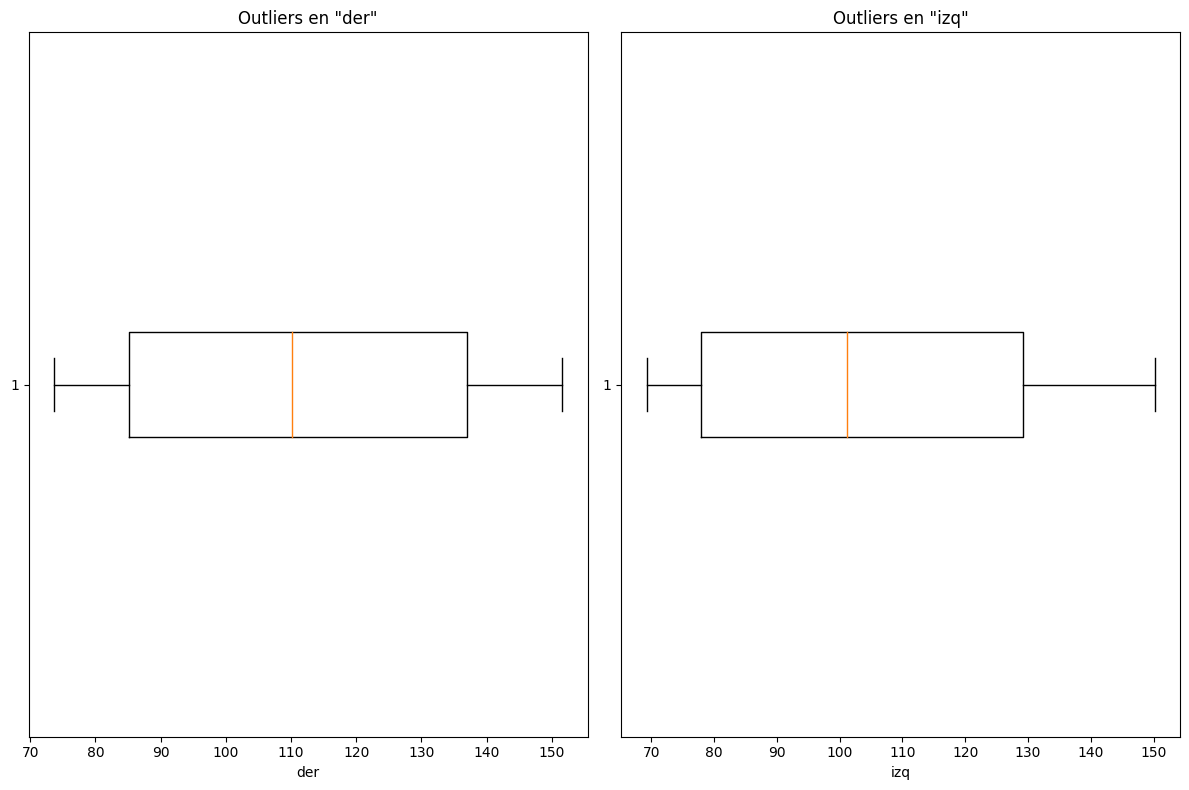

In [ ]:
import matplotlib.pyplot as plt

# Crear un gráfico de caja para cada columna del DataFrame
plt.figure(figsize=(12, 8))  # Tamaño del gráfico

for column in train.columns:
    plt.subplot(1, len(train.columns), train.columns.get_loc(column) + 1)  # Crear un subplot para cada columna
    plt.boxplot(train[column], vert=False)  # Crear el box plot
    plt.title(f'Outliers en "{column}"')  # Título del gráfico
    plt.xlabel(column)  # Etiqueta del eje x

plt.tight_layout()  # Ajustar el diseño de los subplots
plt.show()


Como se puede observar, no hay valores por fuera de los pivotes de la caja, lo cual quiere indicar que no tenemos valores extremos (outliers) por fuera del rango normal esperado.

##3.4 Visualizacion de datos
Finalmente, vamos a visualizar los datos para ver si encontramos errores o inconsistencias en las mediciones de los datos de entrenamiento. Tambien nos interesa ver el comportamiento de los datos mas de cerca, tener una apreciacion mas completa sobre estos.

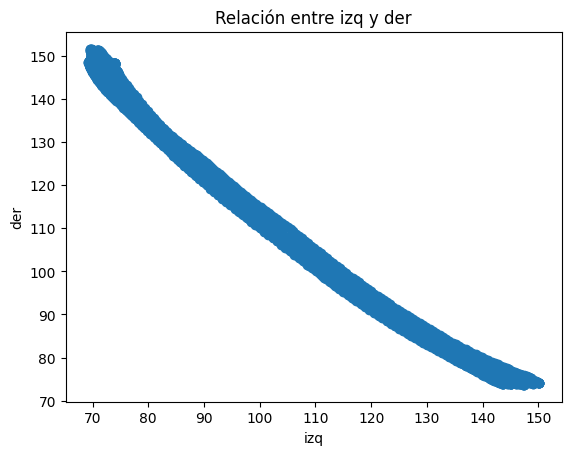

In [ ]:
# Realicemos una grafica del tipo Scatter Plot con todos los datos
plt.scatter(train['izq'], train['der'])
plt.xlabel('izq')
plt.ylabel('der')
plt.title('Relación entre izq y der')
plt.show()

**Comentario:** A grandes rasgos, parece que los datos manejan una relacion lineal de pendiente negativa, no obstante, esta grafica comprende todas las filas del dataframe, asi que es mejor crear unas graficas con una porcion de filas mas pequeños para poder ver a detalle como se comportan los datos.

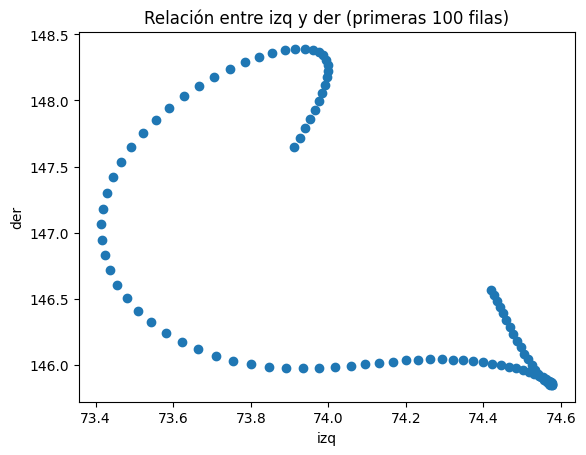

In [ ]:
# Realicemos una grafica del tipo Scatter Plot con las primeras 100 filas
subset_df = train.head(100)

# Creamos un gráfico de dispersión con las primeras 100 filas
plt.scatter(subset_df['izq'], subset_df['der'])
plt.xlabel('izq')
plt.ylabel('der')
plt.title('Relación entre izq y der (primeras 100 filas)')
plt.show()

**Comentario:** Note que al graficar las primeras 100 filas, nos encontramos con una distribucion atipica, esto parece haber sido generado por un error al hacer la toma de datos. Claramente, tenemos que arreglar estos datos antes de entrenar el modelo.

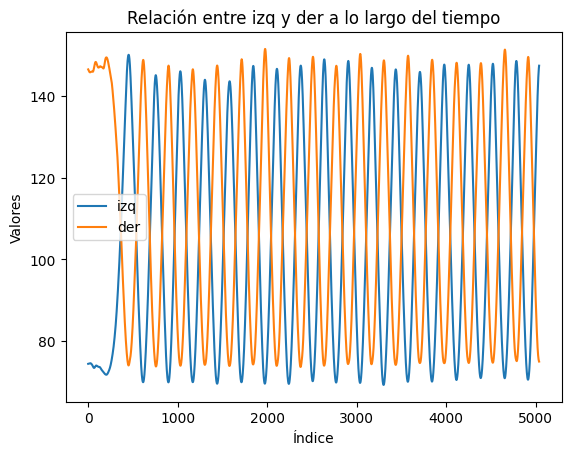

In [ ]:
# Realicemos una grafica del crecimiento en el tiempo de los valores
plt.plot(train['izq'], label='izq')
plt.plot(train['der'], label='der')
plt.xlabel('Índice')
plt.ylabel('Valores')
plt.title('Relación entre izq y der a lo largo del tiempo')
plt.legend()
plt.show()

**Comentario:** Efectivamente, aqui podemos apreciar de mejor manera la verdadera relacion de los datos, y es que estos tienen una distribucion sinusoidal inversa, conforme el movimiento de la pierna izquierda aumenta, el de la pierna derecha disminuye, lo cual tiene sentido para apreciar la manera en como funciona pedalear una bicicleta, conforme una pierna sube, la otra baja. Finalmente, note que en esta grafica tambien se puede observar el error que presentan los datos en el inicio de la distribucion.

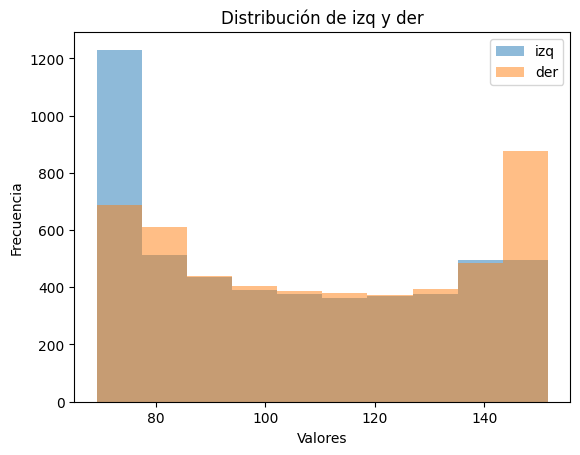

In [ ]:
train[['izq', 'der']].plot(kind='hist', alpha=0.5)
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title('Distribución de izq y der')
plt.show()

**Comentario:** Los valores de la rodilla izquierda tienen mucha mas frecuencia al inicio de los datos, mientras que al final de los datos crece la frecuencia de los valores de la rodilla derecha.

##3.5 Arreglo del desborde inicial


En primer lugar, es necesario identificar el rango de pares de datos en el que se encuentran inconsistencias. Para lograrlo, se generan diversas gráficas que representan los valores con errores, con el fin de determinar dónde se inician y finalizan estas irregularidades dentro del conjunto de datos recopilados.

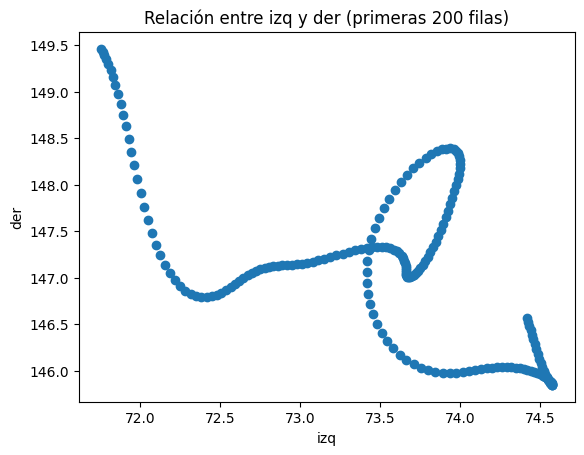

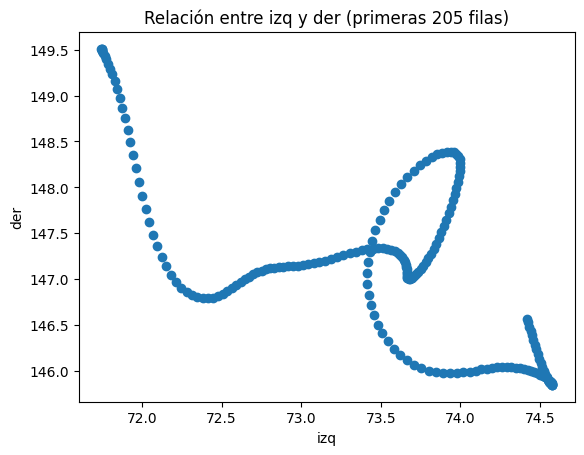

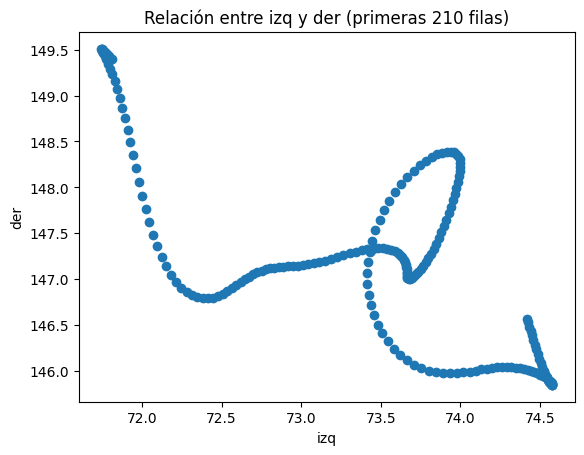

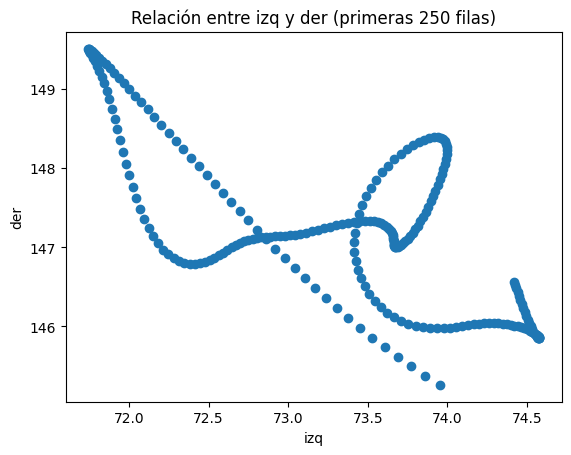

In [ ]:
# Realicemos una grafica del tipo Scatter Plot con las primeras 100 filas
subset_df = train.head(200)

# Creamos un gráfico de dispersión con las primeras 200 filas
plt.scatter(subset_df['izq'], subset_df['der'])
plt.xlabel('izq')
plt.ylabel('der')
plt.title('Relación entre izq y der (primeras 200 filas)')
plt.show()

subset_df = train.head(205)

# Creamos un gráfico de dispersión con las primeras 205 filas
plt.scatter(subset_df['izq'], subset_df['der'])
plt.xlabel('izq')
plt.ylabel('der')
plt.title('Relación entre izq y der (primeras 205 filas)')
plt.show()

subset_df = train.head(210)

# Creamos un gráfico de dispersión con las primeras 21 filas
plt.scatter(subset_df['izq'], subset_df['der'])
plt.xlabel('izq')
plt.ylabel('der')
plt.title('Relación entre izq y der (primeras 210 filas)')
plt.show()

subset_df = train.head(250)

# Creamos un gráfico de dispersión con las primeras 250 filas
plt.scatter(subset_df['izq'], subset_df['der'])
plt.xlabel('izq')
plt.ylabel('der')
plt.title('Relación entre izq y der (primeras 250 filas)')
plt.show()

A partir de las gráficas previas, podemos concluir que los datos inconsistentes se encuentran en los primeros 205 elementos de la colección de datos de entrenamiento, mientras que los elementos posteriores muestran un comportamiento lineal, como era de esperar. Por lo tanto, se deben excluir esos primeros 205 elementos del conjunto de datos.

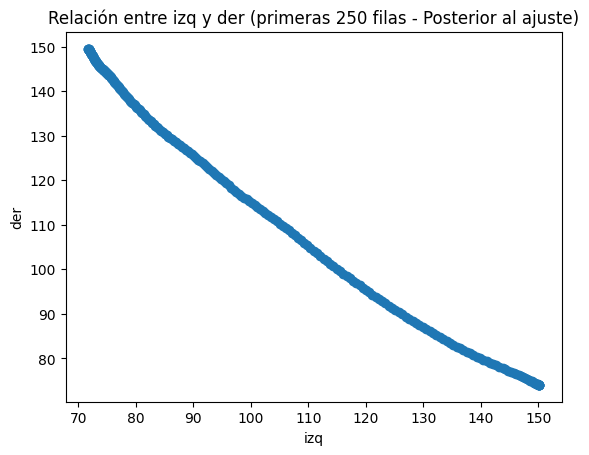

In [ ]:
train = train.iloc[205:].reset_index(drop=True)
subset_df = train.head(250)


# Creamos un gráfico de dispersión con las primeras 205 filas
plt.scatter(subset_df['izq'], subset_df['der'])
plt.xlabel('izq')
plt.ylabel('der')
plt.title('Relación entre izq y der (primeras 250 filas - Posterior al ajuste)')
plt.show()

#4. Entrenamiento del modelo



##4.0 Justificacion matematica
El problema puede ser formulado como un problema de optimización, donde se busca predecir las mediciones de la rodilla izquierda en función del tiempo, representadas por una función $L(k)\in \mathbb{R}$ (donde "L" hace referencia a la rodilla izquierda). En este contexto, "k" es un número entero positivo que denota un instante de tiempo específico donde fue tomada una medición. Estas predicciones se basan en las mediciones de la rodilla derecha en el mismo y $n$ instantes de tiempo posteriores, representadas como $R(k) $ y $ R(k+n)$ respectivamente.

La relación entre $L(k)$ y $R(k+n)$ implica que $L(k)$ se calcula como una combinación lineal de las mediciones de la rodilla derecha en momentos posteriores a $k$. En otras palabras, $L(k)$ es una función que depende de una combinación lineal de $n$ posteriores a $R(k)$, lo que puede expresarse de la siguiente manera:

>  $L(k) = \sum_{i=0}^{n}\beta_iR(k-i) = \beta_0R(k) + \beta_1R(k+1) + \beta_2R(k+2)+...+\beta_nR(k+n)$

Note que los diferentes $\beta_n$ pertenecen a los reales y son constantes para todas las $m$ numero de mediciones, asimismo $n\in \mathbb{N} $ y resulta ser un hiperparametro que se puede ajustar manualmente dependiendo de cuantas medidas posteriores a $k$ se quieren tomar para predecir $L(k)$.

\\
Dado que hay $m$ mediciones, entonces también se pueden plantear $m$ ecuaciones y por lo tanto obtenemos un sistema de ecuaciones que mediante el metodo de minimos cuadrados permitira estimar los $\beta_i$ que mejor aproximen la función.

\\
Por lo tanto el problema se reduce a un problema de optimización cuya funcion se plantea de la siguiente manera:

> min$_{\beta \in R^n}$ $f(β)$ = min$_{\beta \in R^n}$  $||L - Hβ||_2^2 + c||β||_2^2$

Asi mismo el minimizador que la resuelve estará dado por:

> $β^*$ = args min$_{\beta \in R^n} ||L - Hβ||_2^2 + c||β||_2^2$

Que resolviendo de manera analitica nos permite llegar a la expresión:
> $β^* = (H^TH -cI)^{-1} H^TL$

Asimismo, $H$ estará definido como una matriz $m\times n$ (recordando que $m$ representa el número de ecuaciones y $n$ la cantidad de mediciones $R(k)$ tomadas en cuenta en cada ecuación) donde cada fila incluye las mediciones $R(k+i)$, de la siguiente manera:

\begin{equation}
H =
\begin{bmatrix}
R(1) & R(2) & ... & R(1+n)\\
R(2) & ... & ... & ...\\
... & ... & ... & ...\\
R(m) & ... & ... & R(m+n)
\end{bmatrix}
\end{equation}

Observe que, en las últimas ecuaciones, no es posible que dependan de $R(k+n)$ debido a la falta de datos disponibles. Por lo tanto, en estos casos, se considerarán las mediciones con un valor de 0. Asimismo,  $L$ será un vector $m\times 1$ con todos los valores de las $m$ mediciones de la rodilla izquierda, de la siguiente manera:

\begin{equation}
L =
\begin{bmatrix}
L(1)\\
L(2)\\
... \\
L(m)
\end{bmatrix}
\end{equation}


Finalmente, una vez ecnontrado el vector $\beta^*$ (que será un vector de tamaño $n\times 1$, lo que permite la consistencia operacional de $H\beta^*$) se puede reemplazar en la ecuación y se puede empezar empezar a predecir valores $y$ de la posición de la rodilla izquierda futuros mediante la ecuación:

> $y = H\beta^*$


La constante $c$ es un hiperparametro que se podrá ajustar a traves de procesos de entrenamiento y validación.



##4.1 Entrenamiento del modelo con parametros aleatorios
Miremos que primeras impresiones nos arroja el entrenamiento del modelo con unos hiperparametros tomados al azar tanto para el tamaño de la ventana, n, como para la fuerza de la regularizacion.

In [ ]:
# Tamaño de la ventana (n)
n = 10

# Creamos una matriz de diseño X y el vector de valores objetivo y para el entrenamiento
X_train = []
y_train = []

# Aseguraramos que X_train tenga el mismo número de filas que train
for i in range(len(train)):
    row = [1]  # Intercepto
    for j in range(n):
        # Llenar con valores adecuados para las filas que no se usaron
        if i - j < 0:
            row.append(0.0)
        else:
            row.append(train['der'][i - j])
    X_train.append(row)
    y_train.append(train['izq'][i])

# Convertir las listas a matrices NumPy para facilitar el cálculo
X_train = np.array(X_train)
y_train = np.array(y_train)
X_train

array([[  1.    , 149.494 ,   0.    , ...,   0.    ,   0.    ,   0.    ],
       [  1.    , 149.478 , 149.494 , ...,   0.    ,   0.    ,   0.    ],
       [  1.    , 149.457 , 149.478 , ...,   0.    ,   0.    ,   0.    ],
       ...,
       [  1.    ,  75.0909,  75.1718, ...,  76.042 ,  76.2591,  76.4983],
       [  1.    ,  75.0251,  75.0909, ...,  75.8465,  76.042 ,  76.2591],
       [  1.    ,  74.973 ,  75.0251, ...,  75.6722,  75.8465,  76.042 ]])

In [ ]:
# Calcular la matriz de diseño transpuesta
X_train_transpose = X_train.T

# Calcular la matriz Hessian
H = np.dot(X_train_transpose, X_train)

# Obtener el número de observaciones (N)
N = len(y_train)

# Calcular la matriz de identidad
I = np.identity(n + 1)

# Calcular el término de regularización
C = 0.01  # Hiperparametro C
reg_term = C * I

# Calcular (Hessiana + C*I)
Hessiana_reg = H + reg_term

# Calcular la matriz de los betas usando la formula vista en clase
Hessiana_reg_inv = np.linalg.inv(Hessiana_reg)
betas = np.dot(Hessiana_reg_inv,np.dot(X_train_transpose,y_train))

In [ ]:
# Realizamos la prueba del modelo sobre los valores de los datos reales
valid = pd.read_csv("./data/valid.csv", sep=";")

# 1. Reemplazamos las comas por puntos en las cadenas
valid['der'] = valid['der'].str.replace(',', '.', regex=True)
valid['izq'] = valid['izq'].str.replace(',', '.', regex=True)

# 2. Convertimos las cadenas en flotantes
valid['izq'] = valid['izq'].astype(float)
valid['der'] = valid['der'].astype(float)

# Mostramos el DataFrame resultante
valid

,der,izq
0,74.9334,147.618
1,74.9052,147.727
2,74.8876,147.800
3,74.8802,147.838
4,74.8828,147.838
...,...,...
1075,80.9569,138.029
1076,81.4421,137.284
1077,81.9437,136.526
1078,82.4605,135.755


In [ ]:
# De nuevo, creamos una matriz de diseño X y el vector de valores objetivo y para el entrenamiento
X_valid = []
y_valid = []

# De nuevo, nos aseguramos de que X_train tenga el mismo número de filas que train
for i in range(len(valid)):
    row = [1]  # Intercepto
    for j in range(n):
        # Llenar con valores adecuados para las filas que no se usaron
        if i - j < 0:
            row.append(0.0)
        else:
            row.append(valid['der'][i - j])
    X_valid.append(row)
    y_valid.append(valid['izq'][i])

# Convertir las listas a matrices NumPy para facilitar el calculo
X_valid = np.array(X_valid)
y_valid = np.array(y_valid)
X_valid.shape, y_valid.shape

((1080, 11), (1080,))

In [ ]:
# Realizar predicciones en el conjunto de entrenamiento
y_valid_train = np.dot(X_valid, betas)

# Calcular el RMSE entre las predicciones y los valores verdaderos
mse_train = np.mean((y_valid_train - y_valid) ** 2)
rmse_train = round(np.sqrt(mse_train),4)

print(f'RMSE en el conjunto de validacion: {rmse_train}')

RMSE en el conjunto de validacion: 5.4105


In [ ]:
y_valid_train

array([141.88070599, 142.03038769, 142.16832344, ..., 133.70009704,
       133.17869091, 132.64285657])

In [ ]:
y_valid

array([147.618, 147.727, 147.8  , ..., 136.526, 135.755, 134.973])

##4.2 Tabla de comparacion de los RMSE para distintas combinaciones

In [ ]:
import pandas as pd

#Se crea una función para realizar las diferentes pruebas

def training(n_f, C_f):
  # Tamaño de la ventana (n)

  # Creamos una matriz de diseño X y el vector de valores objetivo y para el entrenamiento
  X_train_i = []
  y_train_i = []

  # Aseguraramos que X_train tenga el mismo número de filas que train
  for i in range(len(train)):
      row = [1]  # Intercepto
      for j in range(n_f):
          # Llenar con valores adecuados para las filas que no se usaron
          if i - j < 0:
              row.append(0.0)
          else:
              row.append(train['der'][i - j])
      X_train_i.append(row)
      y_train_i.append(train['izq'][i])

  # Convertir las listas a matrices NumPy para facilitar el cálculo
  X_train_f = np.array(X_train_i)
  y_train_f = np.array(y_train_i)

  # Calcular la matriz de diseño transpuesta
  X_train_transpose_f = X_train_f.T

  # Calcular la matriz Hessian
  H_f = np.dot(X_train_transpose_f, X_train_f)

  # Obtener el número de observaciones (N)
  N_f = len(y_train_f)

  # Calcular la matriz de identidad
  I_f = np.identity(n_f + 1)

  # Calcular el término de regularización
# Hiperparametro C
  reg_term_f = C_f * I_f

  # Calcular (Hessiana + C*I)
  Hessiana_reg_f = H_f + reg_term_f

  # Calcular la matriz de los betas usando la formula vista en clase
  Hessiana_reg_inv_f = np.linalg.inv(Hessiana_reg_f)
  betas_f = np.dot(Hessiana_reg_inv_f,np.dot(X_train_transpose_f,y_train_f))

  X_valid_j = []
  y_valid_j = []

  # De nuevo, nos aseguramos de que X_train tenga el mismo número de filas que train
  for i in range(len(valid)):
      row = [1]  # Intercepto
      for j in range(n_f):
          # Llenar con valores adecuados para las filas que no se usaron
          if i - j < 0:
              row.append(0.0)
          else:
              row.append(valid['der'][i - j])
      X_valid_j.append(row)
      y_valid_j.append(valid['izq'][i])

  # Convertir las listas a matrices NumPy para facilitar el calculo
  X_valid_f = np.array(X_valid_j)
  y_valid_f = np.array(y_valid_j)

  # Realizar predicciones en el conjunto de entrenamiento
  y_valid_train_f = np.dot(X_valid_f, betas_f)

  # Calcular el RMSE entre las predicciones y los valores verdaderos
  mse_train_f = np.mean((y_valid_train_f - y_valid_f) ** 2)
  rmse_train_f = round(np.sqrt(mse_train_f),4)

  return rmse_train_f



"""
Se ejecuta el metodo training para cada una de las combinaciones de hiperparametros (Se omite por simplicidad temporal)
training(450,0.01)
training(460,0.01)
training(470,0.01)
training(480,0.01)
"""
# Crear un diccionario con datos para la tabla
data = {
    'n': [450,460,470,480],
    'c': [0.01,0.01,0.01,0.01],
    'RMSE': [4.6387,
             4.6367,
             4.6370,
             4.6398]
}

# Crear un DataFrame a partir del diccionario
df = pd.DataFrame(data)

# Mostrar la tabla
print(df)



     n     c    RMSE
0  450  0.01  4.6387
1  460  0.01  4.6367
2  470  0.01  4.6370
3  480  0.01  4.6398


En primera instancia, se determinó el hiperparamatro $n$ que minimizaba en mayor proporcion el RMSE, y por tanto el más adecuado.

In [ ]:
data = {
    'n': [10,10,10,10,10,10],
    'c': [0.01,0.001,0.0001,0.00001,0.000001, 0.0000001],
    'RMSE': [training(10,0.01),
             training(10,0.001),
             training(10,0.0001),
             training(10,0.00001),
             training(10,0.000001),
             training(10,0.0000001),]
}


# Crear un DataFrame a partir del diccionario
df = pd.DataFrame(data)

# Mostrar la tabla
print(df)

print('\nHiperparametros finales:\n')
data = {
    'n': [465],
    'c': [0.00001],
    'RMSE': [training(465,0.00001)]
}


# Crear un DataFrame a partir del diccionario
df = pd.DataFrame(data)

# Mostrar la tabla
print(df)

    n             c    RMSE
0  10  1.000000e-02  5.4105
1  10  1.000000e-03  5.4104
2  10  1.000000e-04  5.4104
3  10  1.000000e-05  5.4103
4  10  1.000000e-06  5.4103
5  10  1.000000e-07  5.4103

Hiperparametros finales:

     n        c    RMSE
0  465  0.00001  4.6343


Del mismo modo, se identificó el hiperparámetro $c$ que minimizó de manera significativa el RMSE. Esto llevó a la conclusión de que un valor de $c$ igual a 0.00001, en combinación con una ventana de tamaño $n$ de 460, resultó en una reducción del RMSE a 4.6343.

In [ ]:
# Se definen los hiperparametros de entrenamiento hallados y se entrena nuevamente con estos

n = 200# Hiperparametro n
C = 0.00001  # Hiperparametro C


# Creamos una matriz de diseño X y el vector de valores objetivo y para el entrenamiento
X_train = []
y_train = []

# Aseguraramos que X_train tenga el mismo número de filas que train
for i in range(len(train)):
    row = [1]  # Intercepto
    for j in range(n):
        # Llenar con valores adecuados para las filas que no se usaron
        if i - j < 0:
            row.append(0.0)
        else:
            row.append(train['der'][i - j])
    X_train.append(row)
    y_train.append(train['izq'][i])

# Convertir las listas a matrices NumPy para facilitar el cálculo
X_train = np.array(X_train)
y_train = np.array(y_train)


# Calcular la matriz de diseño transpuesta
X_train_transpose = X_train.T

# Calcular la matriz Hessian
H = np.dot(X_train_transpose, X_train)

# Obtener el número de observaciones (N)
N = len(y_train)

# Calcular la matriz de identidad
I = np.identity(n + 1)

# Calcular el término de regularización

reg_term = C * I

# Calcular (Hessiana + C*I)
Hessiana_reg = H + reg_term

# Calcular la matriz de los betas usando la formula vista en clase
Hessiana_reg_inv = np.linalg.inv(Hessiana_reg)
betas = np.dot(Hessiana_reg_inv,np.dot(X_train_transpose,y_train))

#5. Generacion de etiquetas en el archivo "valores_incognito.csv"

In [ ]:
# Cargar el archivo "valores_incognito.csv" que contiene la columna "der"
valores_incognito = pd.read_csv("./data/valores_incognito.csv", sep=";")

# De nuevo, creamos una matriz de diseño X y el vector de valores objetivo y para el entrenamiento
X_valid = []

# De nuevo, nos aseguramos de que X_train tenga el mismo número de filas que train
for i in range(len(valores_incognito)):
    row = [1]  # Intercepto
    for j in range(n):
        # Llenar con valores adecuados para las filas que no se usaron
        if i - j < 0:
            row.append(0.0)
        else:
            row.append(valid['der'][i - j])
    X_valid.append(row)

# Convertir las listas a matrices NumPy para facilitar el calculo
X_valores_incognito = np.array(X_valid)

In [ ]:
# Realizar predicciones en el conjunto de valores incógnitos
y_pred_valores_incognito = np.dot(X_valores_incognito, betas)

# Agregar las etiquetas predichas (izq) al DataFrame
valores_incognito['izq'] = y_pred_valores_incognito

# Guardar el DataFrame resultante en un nuevo archivo CSV
valores_incognito.to_csv("./data/valores_incognito_predichos.csv", index=False)

valores_incognito

,der,izq
0,"83,5353",141.279191
1,"84,0916",141.429183
2,"84,6594",141.567426
3,"85,238",141.693071
4,"85,827",141.805694
...,...,...
1075,"114,649",135.417965
1076,"114,686",134.899866
1077,"114,702",134.364297
1078,"114,707",133.812429
